<h1 style="text-align: center;">Credit Card Fraud Detection</h1>


In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Load the dataset.

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# To see all the columns
pd.options.display.max_columns = None
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

In [5]:
# Checking dimensions 
df.shape

(284807, 31)

There are 284807 rows and 31 columns.

In [6]:
# Checking dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Check for any null values.
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no null values in the dataset.

In [8]:
# Converting the data to StandardScaler
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()

In [10]:
df['Amount'] = ss.fit_transform(pd.DataFrame(df['Amount']))

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [12]:
# Remove the "Time" column.
df.drop(['Time'],axis=1,inplace=True)

In [13]:
# Checking for duplicate values in dataframe.
df.duplicated().sum()

9144

There are 9144 duplicate rows.

In [14]:
# Droping duplicate rows
df.drop_duplicates(inplace=True)

In [15]:
# Checking if the dataset is balanced dataset or imbalanced dataset!
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

We can see that the data is highly imbalanced.

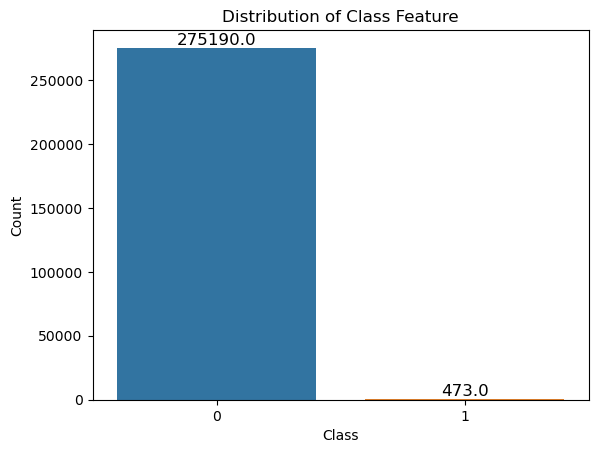

In [16]:
# Plot the countplot on class feature.
ax = sns.countplot(x='Class', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Class Feature")
plt.show()

In [17]:
# Check the efficiency of machine learning model with imbalanced data.
x = df.drop('Class',axis=1)
y = df['Class']

In [18]:
# Divide the dataset into training data and testing data.
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
# Importing some machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [21]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

for name, clf in classifier.items():
    print(f'\n================={name}==============')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precison = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred)
    print(f'Accuracy : {accuracy}')
    print(f'Precision : {precison}')
    print(f'Recall : {recall}')
    print(f'F1 Score : {F1_score}')


=================Logistic Regression==============
Accuracy : 0.9992200678359603
Precision : 0.8870967741935484
Recall : 0.6043956043956044
F1 Score : 0.718954248366013

=================Decision Tree Classifier==============
Accuracy : 0.9989479984764116
Precision : 0.6701030927835051
Recall : 0.7142857142857143
F1 Score : 0.6914893617021276

=================Random Forest Classifier==============
Accuracy : 0.999419585366296
Precision : 0.9041095890410958
Recall : 0.7252747252747253
F1 Score : 0.8048780487804877


# Balancing the dataset using undersampling and oversampling techniques.

In [22]:
# Using Undersampling technique
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [23]:
normal.shape

(275190, 30)

In [24]:
fraud.shape

(473, 30)

In [25]:
normal_sample = normal.sample(n=473)

In [26]:
normal_sample.shape

(473, 30)

In [27]:
new_undersample_df = pd.concat([normal_sample,fraud],ignore_index=True)

In [28]:
new_undersample_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.253764,0.360733,0.651938,0.825910,-0.391299,-0.936982,-0.010430,-0.298631,1.299349,-0.444579,0.762179,-2.032285,2.156836,1.635022,0.273375,0.266060,0.296485,-0.291091,-0.323564,-0.113001,-0.402775,-0.917767,0.140746,0.319456,0.199773,0.055038,-0.055466,0.013896,-0.325323,0
1,-0.691361,0.284309,1.588772,-0.030662,0.707697,0.545994,0.820804,-0.002959,0.068054,-0.690185,0.510952,1.021487,-0.172385,-0.344483,-1.727039,-1.425276,0.401676,-0.296292,2.086117,0.300595,-0.298101,-0.539681,-0.229958,0.727200,0.600228,-0.119365,-0.127321,-0.159204,-0.147568,0
2,1.214789,0.964558,0.425983,2.754122,0.219037,-0.962153,0.554382,-0.448684,0.038055,0.334320,0.898959,-1.922072,2.667476,1.750035,-0.679323,0.151009,0.310414,-0.473391,-1.220411,-0.153084,-0.132592,-0.095128,-0.063847,0.679995,0.701946,0.006434,-0.058182,0.008913,-0.350791,0
3,-5.119443,3.069328,-3.837926,1.352897,-2.981258,-1.140479,-1.615365,3.205357,0.705660,0.291632,0.924179,-1.146701,0.890503,4.444064,-0.713340,0.670114,1.666943,0.978519,0.188116,-0.105337,0.087085,0.027616,-0.155219,0.285081,-0.402891,-0.450848,0.233639,-0.031828,0.006558,0
4,1.208225,-0.167378,0.669688,0.655443,-0.972892,-0.891836,-0.229481,-0.067089,0.886016,-0.268192,-0.670582,-0.074929,-1.384231,0.069249,-0.224337,-0.428055,0.326595,-0.564340,0.204325,-0.192163,-0.087997,-0.075031,-0.027771,0.766590,0.450916,0.654504,-0.042104,0.008302,-0.309250,0


In [29]:
new_undersample_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [30]:
x = new_undersample_df.drop('Class',axis=1)
y = new_undersample_df['Class']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

for name, clf in classifier.items():
    print(f'\n================={name}==============')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precison = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred)
    print(f'Accuracy : {accuracy}')
    print(f'Precision : {precison}')
    print(f'Recall : {recall}')
    print(f'F1 Score : {F1_score}')


=================Logistic Regression==============
Accuracy : 0.9263157894736842
Precision : 0.9489795918367347
Recall : 0.9117647058823529
F1 Score : 0.9300000000000002

=================Decision Tree Classifier==============
Accuracy : 0.8789473684210526
Precision : 0.8910891089108911
Recall : 0.8823529411764706
F1 Score : 0.8866995073891626

=================Random Forest Classifier==============
Accuracy : 0.9421052631578948
Precision : 0.9789473684210527
Recall : 0.9117647058823529
F1 Score : 0.9441624365482234


There is a problem in undersampling technique i.e. data lost. 

In [33]:
# Using Oversampling technique (Using SMOTE)
x = df.drop('Class',axis=1)
y = df['Class']

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
x_res, y_res = SMOTE().fit_resample(x,y)

In [36]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [38]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

for name, clf in classifier.items():
    print(f'\n================={name}==============')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precison = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred)
    print(f'Accuracy : {accuracy}')
    print(f'Precision : {precison}')
    print(f'Recall : {recall}')
    print(f'F1 Score : {F1_score}')


=================Logistic Regression==============
Accuracy : 0.9447472655256368
Precision : 0.973169552181062
Recall : 0.9146410195807502
F1 Score : 0.942997994339163

=================Decision Tree Classifier==============
Accuracy : 0.9983102583669464
Precision : 0.9976035293476879
Recall : 0.9990182353689798
F1 Score : 0.9983103811634751

=================Random Forest Classifier==============
Accuracy : 0.9999273229405138
Precision : 0.9998545745396376
Recall : 1.0
F1 Score : 0.9999272819822931


In [39]:
dtc = DecisionTreeClassifier()
dtc.fit(x_res, y_res)

DecisionTreeClassifier()

In [40]:
import joblib

In [41]:
joblib.dump(dtc, "credit_card_model.pkl")

['credit_card_model.pkl']

In [42]:
model = joblib.load("credit_card_model.pkl")

In [50]:
pred1 = model.predict([[-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]])

In [51]:
pred1[0]

0

In [52]:
if pred1[0] == 0:
    print('Normal Transaction')
else:
    print('Fraud Transaction')

Normal Transaction


In [64]:
pred2 = model.predict([[-2.3122265423263,1.95199201064158,-1.60985073229769,3.9979055875468,-0.522187864667764,-1.42654531920595,-2.53738730624579,1.39165724829804,-2.77008927719433,-2.77227214465915,3.20203320709635,-2.89990738849473,-0.595221881324605,-4.28925378244217,0.389724120274487,-1.14074717980657,-2.83005567450437,-0.0168224681808257,0.416955705037907,0.126910559061474,0.517232370861764,-0.0350493686052974,-0.465211076182388,0.320198198514526,0.0445191674731724,0.177839798284401,0.261145002567677,-0.143275874698919,-0.35322939296682354]])

In [65]:
if pred2[0] == 0:
    print('Normal Transaction')
else:
    print('Fraud Transaction')

Fraud Transaction
